# Illya-BOICHUK-Camp-2025

## Answer

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('data/Groceries_dataset.csv')

In [109]:
print(df.head())
print(f"\nNumber of records in the dataset: {len(df)}")
print(f"Number of unique customers: {df['Member_number'].nunique()}")
print(f"Number of unique products: {df['itemDescription'].nunique()}")

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Number of records in the dataset: 38765
Number of unique customers: 3898
Number of unique products: 167


In [110]:
transaction_lengths = [len(g) for _, g in df.groupby(['Member_number', 'Date'])]

print(f"Total number of transactions: {len(transaction_lengths)}")
print(f"Average number of items per transaction: {np.mean(transaction_lengths):.2f}")
print(f"Maximum number of items in a transaction: {max(transaction_lengths)}")

Total number of transactions: 14963
Average number of items per transaction: 2.59
Maximum number of items in a transaction: 11


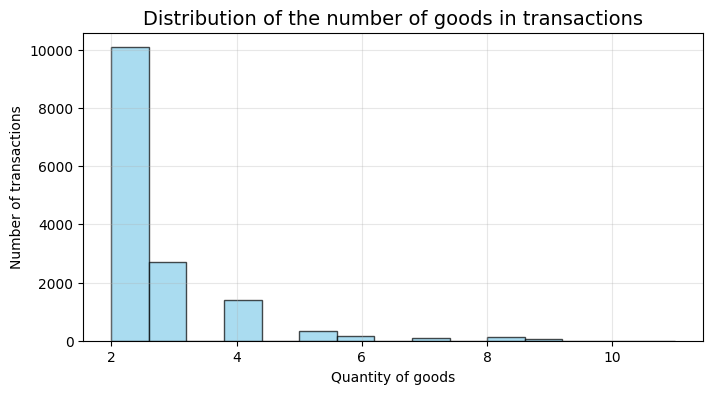

In [111]:
plt.figure(figsize=(8, 4))
plt.hist(transaction_lengths, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of the number of goods in transactions', fontsize=14)
plt.xlabel('Quantity of goods')
plt.ylabel('Number of transactions')
plt.grid(True, alpha=0.3)
plt.show()

In [112]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(drop=True)
print(f"Number of transactions to analyse: {len(transactions)}")
print("Transaction examples:")
for i in range(3):
    print(f"Transaction {i+1}: {transactions.iloc[i]}")
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print(f"\nThe size of the encoded dataset: {df_encoded.shape}")
print("First 5 lines of the encoded dataset:")
print(df_encoded.head())

Number of transactions to analyse: 14963
Transaction examples:
Transaction 1: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 2: ['whole milk', 'pastry', 'salty snack']
Transaction 3: ['canned beer', 'misc. beverages']

The size of the encoded dataset: (14963, 167)
First 5 lines of the encoded dataset:
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False 

In [113]:
min_sup = 0.01
frequent_itemsets = apriori(df_encoded, min_support=min_sup, use_colnames=True)
print(f"З min_support={min_sup}: found {len(frequent_itemsets)} frequent sets")
final_frequent_itemsets = frequent_itemsets
final_min_support = min_sup

print(f"\nUsing min_support={final_min_support}")
print("Top 15 most frequent sets:")
top_frequent = final_frequent_itemsets.sort_values(by='support', ascending=False).head(15)
print(top_frequent)

З min_support=0.01: found 69 frequent sets

Using min_support=0.01
Top 15 most frequent sets:
     support            itemsets
62  0.157923        (whole milk)
40  0.122101  (other vegetables)
46  0.110005        (rolls/buns)
52  0.097106              (soda)
63  0.085879            (yogurt)
47  0.069572   (root vegetables)
57  0.067767    (tropical fruit)
5   0.060683     (bottled water)
49  0.060349           (sausage)
15  0.053131      (citrus fruit)
41  0.051728            (pastry)
42  0.049054         (pip fruit)
50  0.047584     (shopping bags)
10  0.046916       (canned beer)
4   0.045312      (bottled beer)


In [ ]:
rules = None
rules = association_rules(final_frequent_itemsets, metric="lift", min_threshold=0.5)
print(f"Found {len(rules)} rules")

Found 10 rules


In [ ]:
results = []
for idx, rule in rules.iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    
    results.append({
        'Rule |': f"{antecedent} → {consequent} |",
        'Support |': f"{rule['support']:.4f} |",
        'Trust |': f"{rule['confidence']:.4f} |",
        'Lift |': f"{rule['lift']:.4f} |",
        'Persuasiveness |': f"{rule['conviction']:.4f} |",
        'Interpretation |': f"If they buy {antecedent} in {rule['confidence']*100:.1f}% of cases also buy {consequent} |"
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                         Rule | Support |  Trust |   Lift | Persuasiveness |                                                     Interpretation |
other vegetables → rolls/buns |  0.0106 | 0.0865 | 0.7862 |         0.9742 |  If they buy other vegetables in 8.6% of cases also buy rolls/buns |
rolls/buns → other vegetables |  0.0106 | 0.0960 | 0.7862 |         0.9711 |  If they buy rolls/buns in 9.6% of cases also buy other vegetables |
whole milk → other vegetables |  0.0148 | 0.0939 | 0.7694 |         0.9689 |  If they buy whole milk in 9.4% of cases also buy other vegetables |
other vegetables → whole milk |  0.0148 | 0.1215 | 0.7694 |         0.9586 | If they buy other vegetables in 12.2% of cases also buy whole milk |
      whole milk → rolls/buns |  0.0140 | 0.0884 | 0.8040 |         0.9764 |        If they buy whole milk in 8.8% of cases also buy rolls/buns |
      rolls/buns → whole milk |  0.0140 | 0.1270 | 0.8040 |         0.9646 |       If they buy rolls/buns in 12.7% of cases 

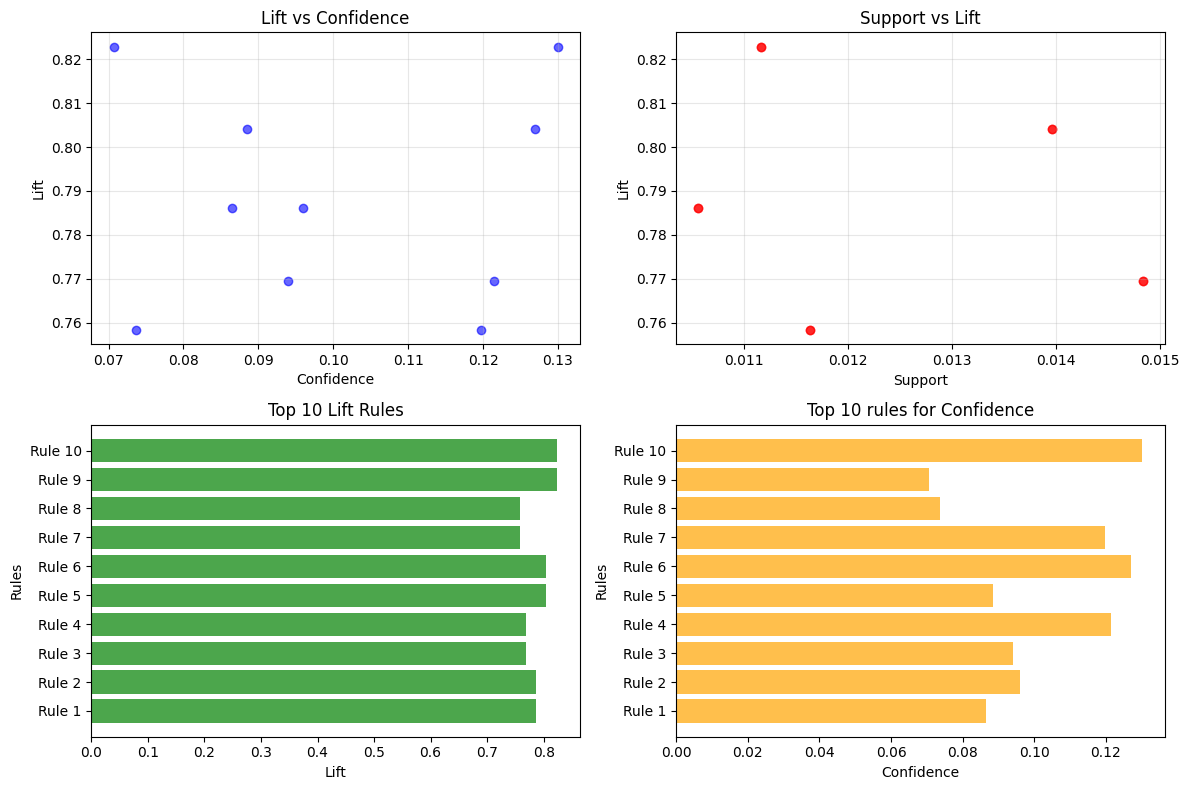

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(rules['confidence'], rules['lift'], alpha=0.6, c='blue')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(rules['support'], rules['lift'], alpha=0.6, c='red')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
y_pos = range(len(rules))
plt.barh(y_pos, rules['lift'], color='green', alpha=0.7)
plt.ylabel('Rules')
plt.xlabel('Lift')
plt.title('Top 10 Lift Rules')
plt.yticks(y_pos, [f"Rule {i+1}" for i in y_pos])

plt.subplot(2, 2, 4)
plt.barh(y_pos, rules['confidence'], color='orange', alpha=0.7)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.title('Top 10 rules for Confidence')
plt.yticks(y_pos, [f"Rule {i+1}" for i in y_pos])

plt.tight_layout()
plt.show()

In [ ]:
print("The following recommendations can be made based on the association rules found:")
for i, rule in enumerate(rules.head(10).iterrows(), 1):
    rule = rule[1]
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    print(f"{i}. For customers {antecedent} recommend {consequent} (probability: {rule['confidence']*100:.1f}%)")

The following recommendations can be made based on the association rules found:
1. For customers other vegetables recommend rolls/buns (probability: 8.6%)
2. For customers rolls/buns recommend other vegetables (probability: 9.6%)
3. For customers whole milk recommend other vegetables (probability: 9.4%)
4. For customers other vegetables recommend whole milk (probability: 12.2%)
5. For customers whole milk recommend rolls/buns (probability: 8.8%)
6. For customers rolls/buns recommend whole milk (probability: 12.7%)
7. For customers soda recommend whole milk (probability: 12.0%)
8. For customers whole milk recommend soda (probability: 7.4%)
9. For customers whole milk recommend yogurt (probability: 7.1%)
10. For customers yogurt recommend whole milk (probability: 13.0%)
